In [15]:
import requests
import os

communes = [
    33003, 33004, 33013, 33023, 33032, 33033, 33037, 33039, 33049, 33056,
    33059, 33061, 33063, 33065, 33069, 33075, 33077, 33080, 33083, 33084,
    33085, 33090, 33096, 33099, 33109, 33118, 33119, 33122, 33140, 33141,
    33145, 33162, 33165, 33167, 33192, 33200, 33201, 33206, 33213, 33234,
    33238, 33245, 33249, 33252, 33256, 33262, 33263, 33273, 33274, 33281,
    33293, 33312, 33318, 33322, 33330, 33335, 33349, 33363, 33376, 33381,
    33397, 33408, 33422, 33431, 33433, 33434, 33448, 33449, 33454, 33474,
    33483, 33487, 33496, 33501, 33505, 33518, 33519, 33522, 33534, 33535,
    33550, 33554
]

destination_folder = "data"
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for c in communes:
    for data_type in ['parcelles', 'batiments']:
        filename = f"cadastre-{c}-{data_type}.json.gz"
        url = f"https://cadastre.data.gouv.fr/data/etalab-cadastre/2023-07-01/geojson/communes/33/{c}/{filename}"

        response = requests.get(url, stream=True)
        response.raise_for_status()  # vérifier que la demande a réussi

        # Enregistrement du fichier
        with open(os.path.join(destination_folder, filename), 'wb') as fd:
            for chunk in response.iter_content(chunk_size=8192):
                fd.write(chunk)

print("Téléchargement terminé.")


Téléchargement terminé.


In [16]:
import os
import gzip

data_directory = "data/"

# Lister tous les fichiers .json.gz dans le répertoire
gz_files = [f for f in os.listdir(data_directory) if f.endswith('.json.gz')]

for file in gz_files:
    # Chemin complet du fichier .json.gz
    gz_filepath = os.path.join(data_directory, file)
    
    # Chemin de sortie pour le fichier .json
    json_filepath = os.path.join(data_directory, file[:-3])  # On retire l'extension .gz
    
    # Ouvrir le fichier .gz, le lire, décompresser le contenu, puis l'enregistrer en .json
    with gzip.open(gz_filepath, 'rt') as gz_file:
        with open(json_filepath, 'w') as json_file:
            json_file.write(gz_file.read())

print("Décompression terminée.")


Décompression terminée.


In [18]:
import os

data_directory = "data"

# Lister tous les fichiers .gz dans le répertoire
gz_files = [f for f in os.listdir(data_directory) if f.endswith('.gz')]

# Supprimer chaque fichier .gz
for file in gz_files:
    os.remove(os.path.join(data_directory, file))

print("Tous les fichiers .gz ont été supprimés.")


Tous les fichiers .gz ont été supprimés.


ValueError: Image size of 72000x72000 pixels is too large. It must be less than 2^16 in each direction.

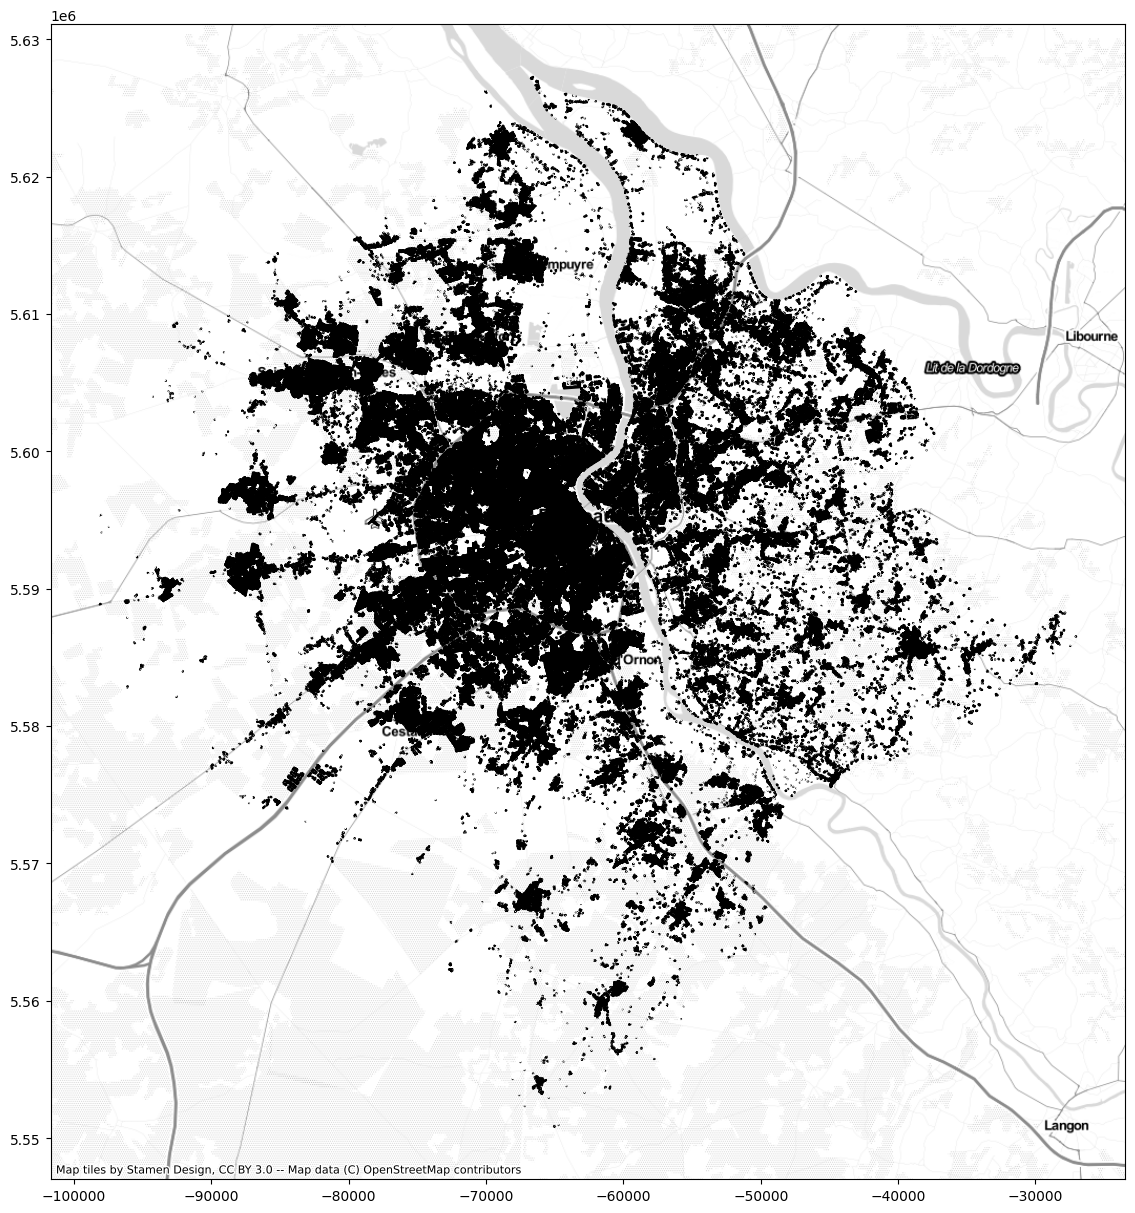

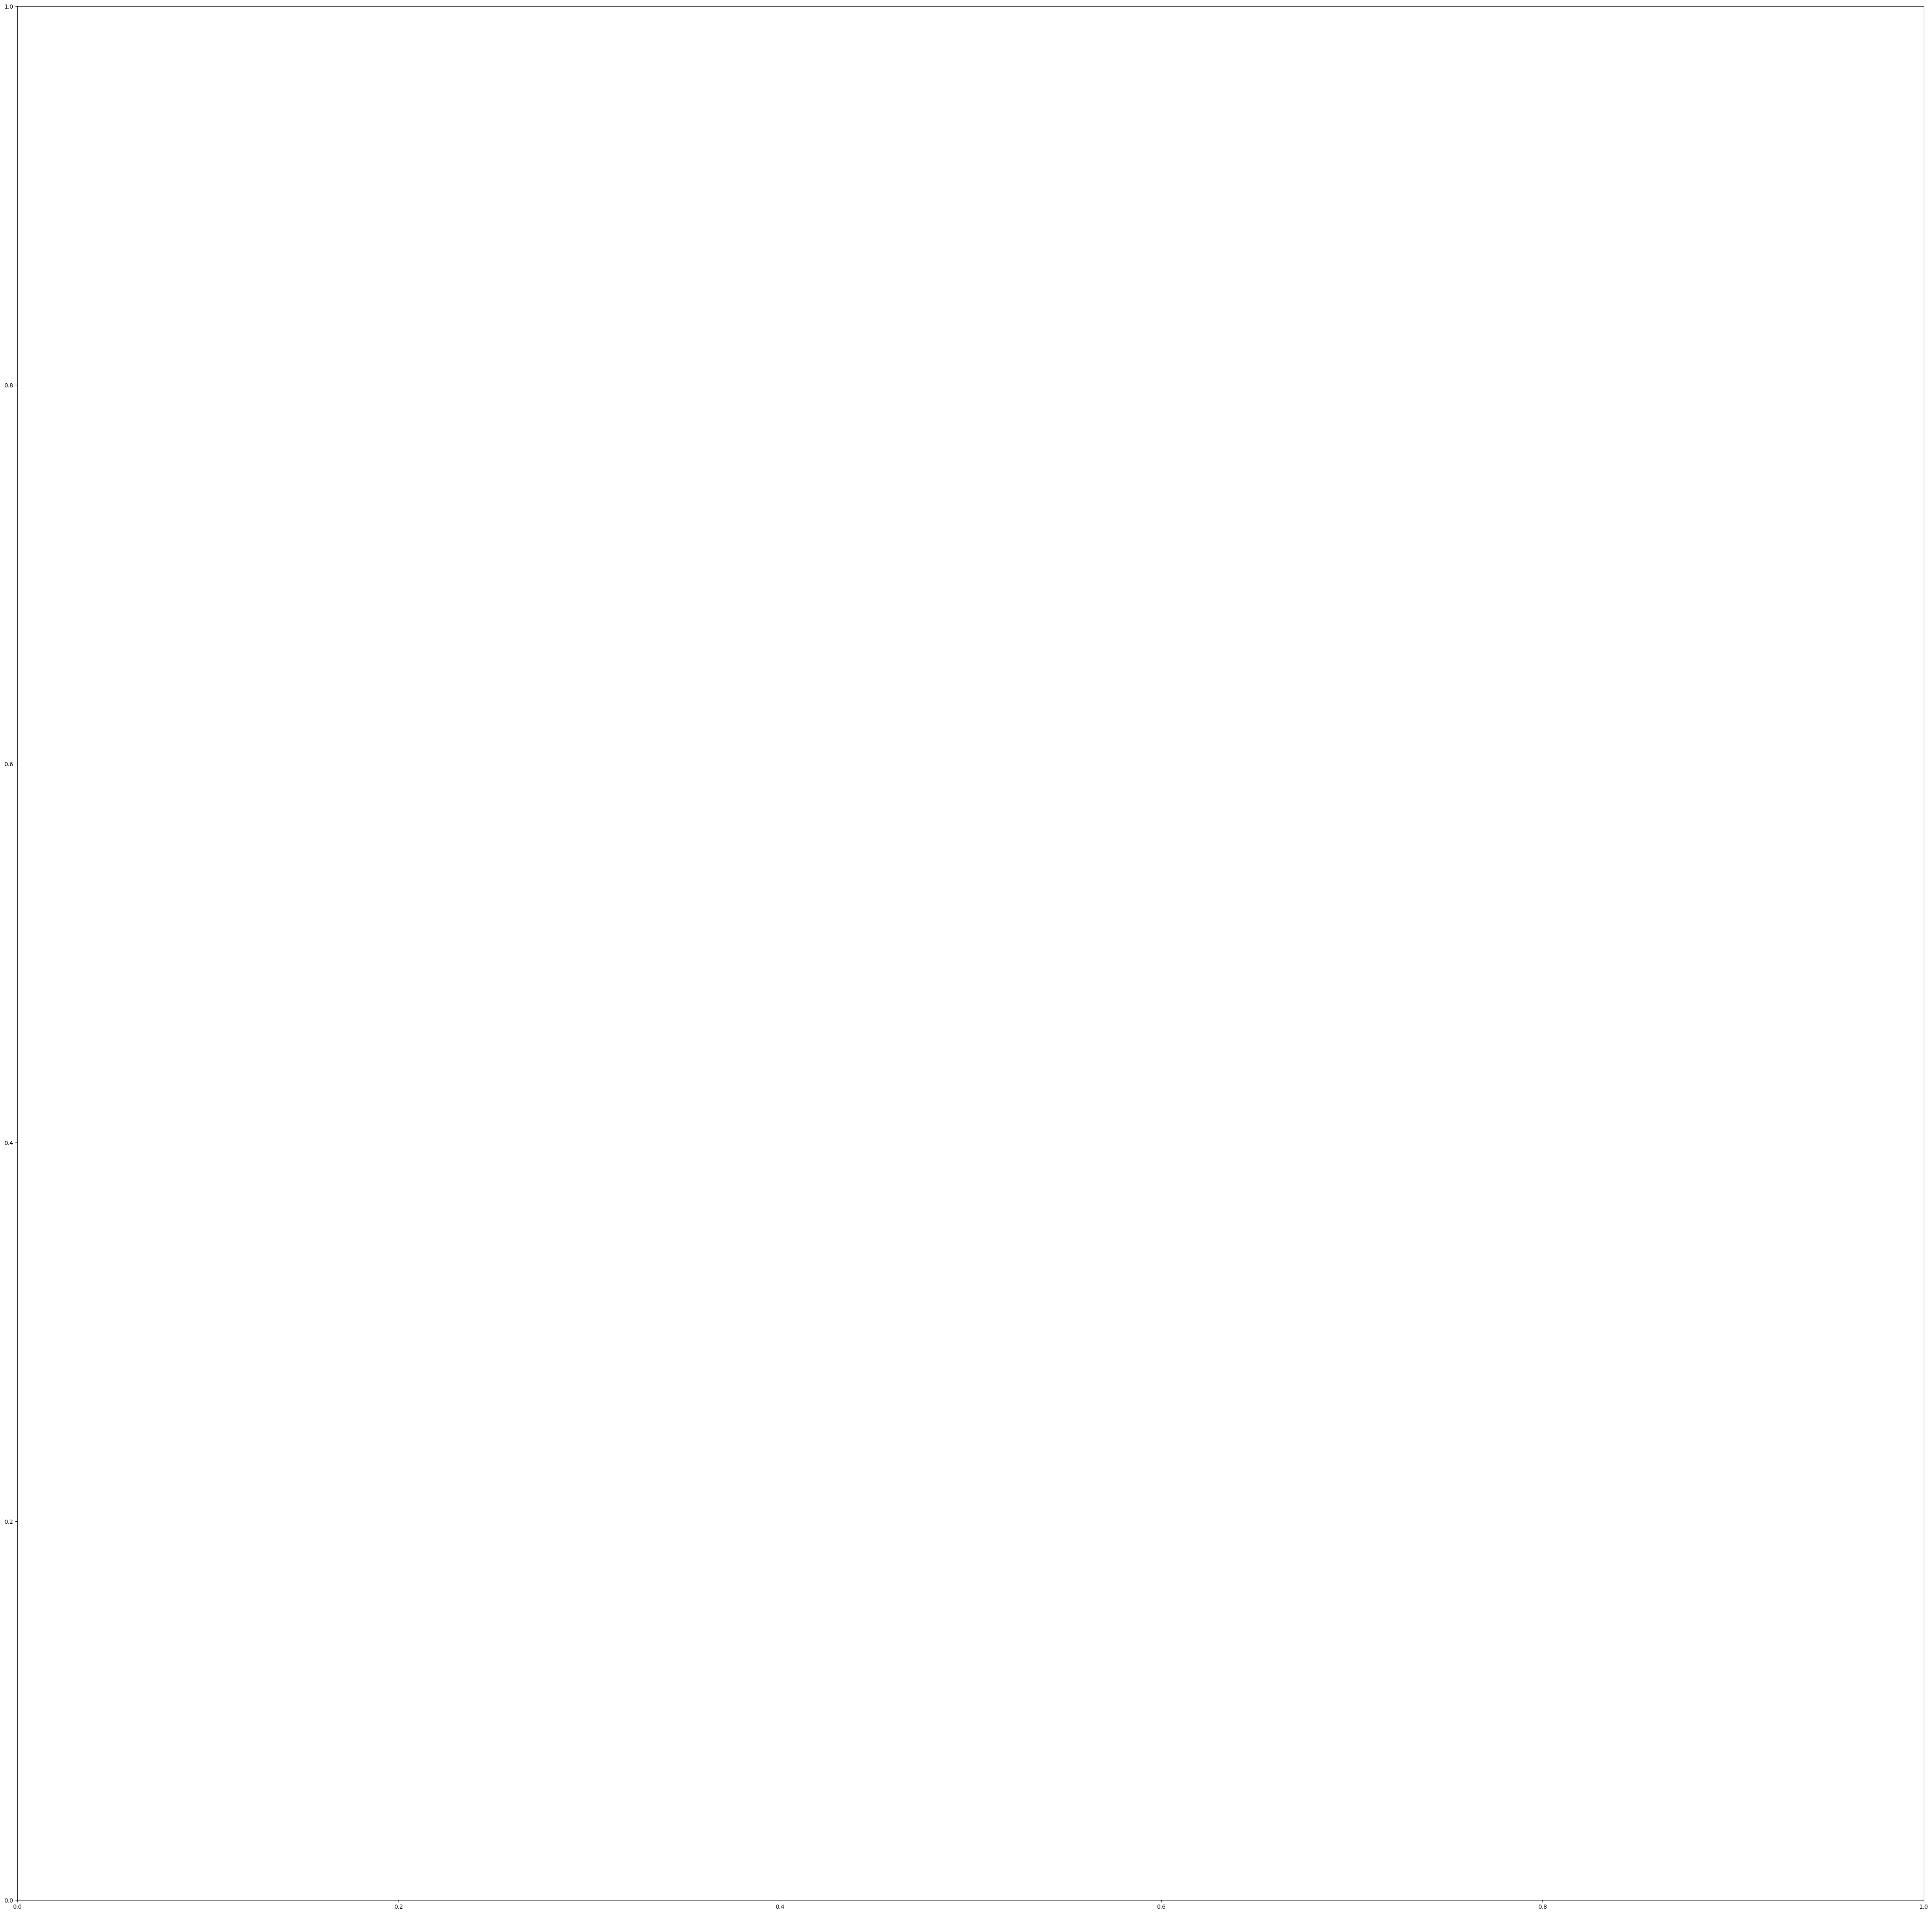

In [3]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# Définir le répertoire contenant tous les fichiers GeoJSON de type bâtiment
data_directory = "data/"

# Lister tous les fichiers GeoJSON dans le répertoire
geojson_files = [f for f in os.listdir(data_directory) if f.endswith('-batiments.json')]

# Charger tous les fichiers GeoJSON, les filtrer, et les stocker dans une liste
all_gdfs = []
for file in geojson_files:
    gdf = gpd.read_file(os.path.join(data_directory, file))
    gdf = gdf[gdf['type'] == "01"].reset_index(drop=True)
    all_gdfs.append(gdf)

# Concaténer tous les GeoDataFrame en un seul
combined_gdf = pd.concat(all_gdfs, ignore_index=True)

# Ensure the data is in Web Mercator projection
combined_gdf = combined_gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 15))
combined_gdf.boundary.plot(ax=ax, color="black")

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Créer une figure avec des dimensions plus grandes
fig, ax = plt.subplots(figsize=(60, 60))  # Augmentez la taille de la figure

# Save the figure
plt.savefig("map.png", dpi=1200)

plt.show()